In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv(r"C:\Users\SOUMYA\Downloads\train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
x_train = train.iloc[:, 1:].values.astype('float32')
labels = train.iloc[:, 0].values.astype('int32')

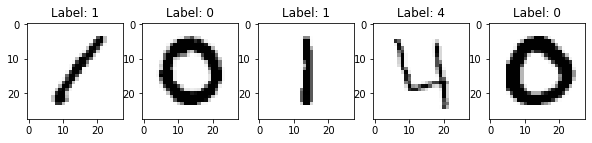

In [3]:
fig = plt.figure(figsize=(10, 10))
for i in range(5):
    fig.add_subplot(1, 5, i+1)
    plt.title('Label: {label}'.format(label=labels[i]))
    plt.imshow(x_train[i].reshape(28, 28), cmap='Greys')

In [4]:
y_train = np.zeros([labels.shape[0], 10])
for i in range(labels.shape[0]):
        y_train[i][labels[i]] = 1
y_train.view(type=np.matrix)

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]])

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)
print('Train size: {train}, Test size: {test}'.format(train=x_train.shape, test=x_test.shape))
print('Train label size: {train}, Test label size: {test}'.format(train=y_train.shape, test=y_test.shape))

Train size: (33600, 784), Test size: (8400, 784)
Train label size: (33600, 10), Test label size: (8400, 10)


In [6]:
INPUT_LENGHT = x_train.shape[1] 
HIDDEN_UNITS = 50
Win = np.genfromtxt('output.csv')
print (Win.shape)
print('Input Weight shape: {shape}'.format(shape=Win.shape))
for i in range (5):
    print(Win[i][:])

(784, 50)
Input Weight shape: (784, 50)
[ 0.04774193 -0.43443261 -0.81779063  0.52325136 -0.19158825 -0.32097785
  0.73195721  0.93991867 -0.43607131  0.60071807  0.56005628  0.56648219
  0.70536228  0.91815987 -0.05499314 -0.38841719 -0.85576592  0.97412909
  0.95171472  0.32573969  0.56449557 -0.66278953 -0.46275173  0.16682143
 -0.65673369 -0.65668636  0.12947974  0.54496471  0.88111667 -0.60655388
 -0.4308064   0.68371998  0.04317185  0.24706987 -0.35922893 -0.06044745
 -0.11594359 -0.0228657   0.65894306 -0.90841067  0.38355307 -0.55153501
  0.85604701  0.22034037  0.39045415 -0.61335737 -0.59034282  0.27293008
  0.37502669  0.30005068]
[ 0.07016378 -0.09449914  0.78728817 -0.75739603 -0.32736021 -0.70409535
 -0.30891706 -0.60884966  0.31535593 -0.84810006 -0.56391212 -0.5853664
  0.06657064 -0.02259649  0.82477466  0.58005827 -0.36445249 -0.58237357
  0.84611875 -0.32837236 -0.24531507 -0.25148834 -0.63649113  0.56023312
 -0.31326927  0.44167515  0.10991646  0.4672573   0.6687369

In [7]:
def input_to_hidden(x):
    a = np.dot(x, Win)
    a = np.maximum(a, 0, a)
    return a

In [8]:
X = input_to_hidden(x_train)
Xt = np.transpose(X)
Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_train))
print('Output weights shape: {shape}'.format(shape=Wout.shape))

Output weights shape: (50, 10)


In [9]:
def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, Wout)
    return y

In [10]:
y = predict(x_test)
correct = 0
total = y.shape[0]
for i in range(total):
    predicted = np.argmax(y[i])
    test = np.argmax(y_test[i])
    correct = correct + (1 if predicted == test else 0)
print('Accuracy: {:f}'.format(correct/total))

Accuracy: 0.732381


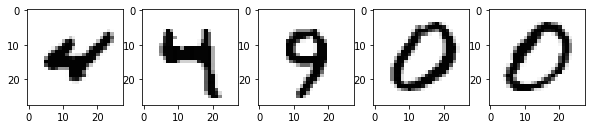

In [11]:
fig = plt.figure(figsize=(10, 10))
for i in range(5):
    fig.add_subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='Greys')
    

In [12]:
for i in range (5):
    print(np.argmax(y[i]), end = ' ')

4 4 9 0 0 